<div class="alert alert-block alert-info">

<font size=6><b> Project: Predicting house prices based. </b></font>
    
<br>
    
<font size=4> In this exercise I am going to use <b>linear regression techniques</b> to predict the target variable (<b>SalePrice</b>). For this effect I will be using two datasets from kaggle. One is the train dataset, wich we will use to prform all the data preparation and modeling. The other one is the test dataset, that we will use at the end of the exercise to make our predictions. 
    
<br>
<br>
    
<p><b>By: </b> Rodrigo Sarroeira</p>
      
<p><b>On: </b> XX/02/2021</p>

<br>    
    
<p><b>Kaggle Link: </b> https://www.kaggle.com/c/house-prices-advanced-regression-techniques </p>    
</font>
</div>

<br>
<br>

<div class="alert alert-block alert-info"> <font size=5> <b> 0. Libraries  </b> </font></div>
<br>
<font size=3>This are the libraries we will be using throughout this exercise.</font

In [37]:
library("dplyr")
library("Metrics")
library("olsrr")
library("MASS")
library("ggplot2")
library("plotly")
library("car")

 <div class="alert alert-block alert-info"> <font size=5> <b>1. Import Dataset</b> </font></div>

In [38]:
# import train dataset to dataframe
data = read.csv("train.csv")

# Transform all character variables to factors
house = mutate_if(data, is.character, as.factor)

In [39]:
head(house)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


<div class="alert alert-block alert-info"> <font size=5> <b>2. Structure Analisys</b> </font></div>

In [40]:
# Number Variables
ncol(house)

# Number of Observations
nrow(house)

[1] 81

[1] 1460

In [41]:
# all the variables of the datataset
str(house)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..:

<font size=3>As we can see, our train dataset has  1460 observations (lines) and 81 variables (columns). From wich 38 are `numeric` and the other are `Factors`. In the modeling part we are going to create two models, one only with `numeric` variables and another with the `Factor` variables.</font>

<div class="alert alert-block alert-info"> <font size=5> <b> 3. Numeric Model</b> </font></div>
<br>
<font size=3>To build this model we are only going to numeric variables. The following variables were chosen because of their correlation with the target variable `SalePrice` and their significance level. `lm()` function calculates the significance level based on the p-value. In this case we want to reject the null Hypotesys for the lowest significance code. Where `***` is 0 and `.` is 0.1.     
</font>

<font size=3>First we have to see which variables have the greatest correlation with the `SalePrice`. For that we can use the function corr(). When this function is used on default it calculates the Pearson Coeficient:    
</font>

<br>
<br>

<div style="margin-left: 200px;">
<font size=10>
    
$  \frac{\sum _{} ^{}  (x \ - \ mean(x)) \ (y \ - \ mean(y)) } {\sqrt{\sum _{(x \ - \ mean(x))^2} * \sum _{(y \ - \ mean(y))^2} }} $
    
</font>
</div>

<br>
<br>

<font size=3> We are working with numeric variables to build this first model. On the two tables in the next box we can find the correlations between every two variables of the dataframe `house_num`. Correlation takes values between -1 and 1. Whe the correlation between two variables is near zero, it means that the two variables are not linear related, on the other hand when we get values near -1 or 1 we say that there is high correlation (negative or positive).
</font>    
<br>
<br>

In [42]:
# all the numeric variables
house_num = select_if(house, is.numeric)

tail(cor(house_num))[,2:20]
tail(cor(house_num))[,21:38]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
ScreenPorch,-0.026030177,NA,0.043160378,0.06488636,0.054810529,-0.050364435,-0.038740011,NA,0.062020623,0.088871251,-0.01257927,0.08448899,0.08875807,0.04060645,0.026799413,0.10151040,0.02314773,0.032121407,-0.008106093
PoolArea,0.008282708,NA,0.077672392,0.06516584,-0.001984942,0.004949728,0.005829372,NA,0.140491286,0.041709055,-0.03509224,0.12605313,0.13152498,0.08148688,0.062157372,0.17020534,0.06761556,0.020024630,0.049603826
MiscVal,-0.007683291,NA,0.038067692,-0.03140621,0.068776806,-0.034383139,-0.010286249,NA,0.003571473,0.004939781,-0.02383665,-0.01847892,-0.02109572,0.01619687,-0.003792871,-0.00241564,-0.02304702,-0.007366525,-0.014289845
MoSold,-0.013584643,NA,0.001204988,0.07081517,-0.003510839,0.012398471,0.021490002,NA,-0.015726948,-0.015210738,0.03488844,0.01319618,0.03137156,0.03516443,-0.022173961,0.05023968,-0.02536089,0.032872705,0.055872129
YrSold,-0.021407038,NA,-0.014261407,-0.02734671,0.043949746,-0.013617680,0.035743247,NA,0.014358922,0.031705637,-0.04125819,-0.01496865,-0.01360377,-0.02869991,-0.028920880,-0.03652582,0.06704914,-0.046523882,-0.019668841
SalePrice,-0.084284135,NA,0.263843354,0.79098160,-0.077855894,0.522897333,0.507100967,NA,0.386419806,-0.011378121,0.21447911,0.61358055,0.60585218,0.31933380,-0.025606130,0.70862448,0.22712223,-0.016844154,0.560663763


,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
ScreenPorch,0.072425845,0.044299691,-0.05161337,0.05938260,0.184530270,NA,0.05049379,0.05141176,-0.074181351,0.07430394,-0.082864245,-0.0314358470,1.00000000,0.05130739,0.031945761,0.02321699,0.010694106,0.11144657
PoolArea,0.022381498,0.070702584,-0.01452512,0.08375735,0.095073522,NA,0.02093353,0.06104727,0.073378207,0.06076211,0.054202562,-0.0079915489,0.05130739,1.00000000,0.029668651,-0.03373664,-0.059688932,0.09240355
MiscVal,0.001290145,0.007766972,0.06234072,0.02476288,0.001408605,NA,-0.04308013,-0.02739991,-0.009551228,-0.01858374,0.018360600,0.0003539653,0.03194576,0.02966865,1.000000000,-0.00649455,0.004906262,-0.02118958
MoSold,-0.009049888,0.046543860,0.02658891,0.03690708,0.046357102,NA,0.04052173,0.02797380,0.021011044,0.07125488,-0.028887266,0.0294737952,0.02321699,-0.03373664,-0.006494550,1.00000000,-0.145721413,0.04643225
YrSold,-0.010268669,-0.036013893,0.03168721,-0.03451635,-0.024095565,NA,-0.03911690,-0.02737794,0.022270451,-0.05761936,-0.009915937,0.0186449254,0.01069411,-0.05968893,0.004906262,-0.14572141,1.000000000,-0.02892259
SalePrice,0.284107676,0.168213154,-0.13590737,0.53372316,0.466928837,NA,0.64040920,0.62343144,0.324413445,0.31585623,-0.128577958,0.0445836653,0.11144657,0.09240355,-0.021189580,0.04643225,-0.028922585,1.00000000


<div class="alert alert-block alert-info"> <font size=4> <b> 3.1 Scatter Plots</b> </font></div>

<font size=3> To understand how two variables can relate to each other I am going to create 3 scatter plots, between `SalePrice` and other variables.</font>    


In [121]:
# set plot size
options(repr.plot.width=8, repr.plot.height=8)

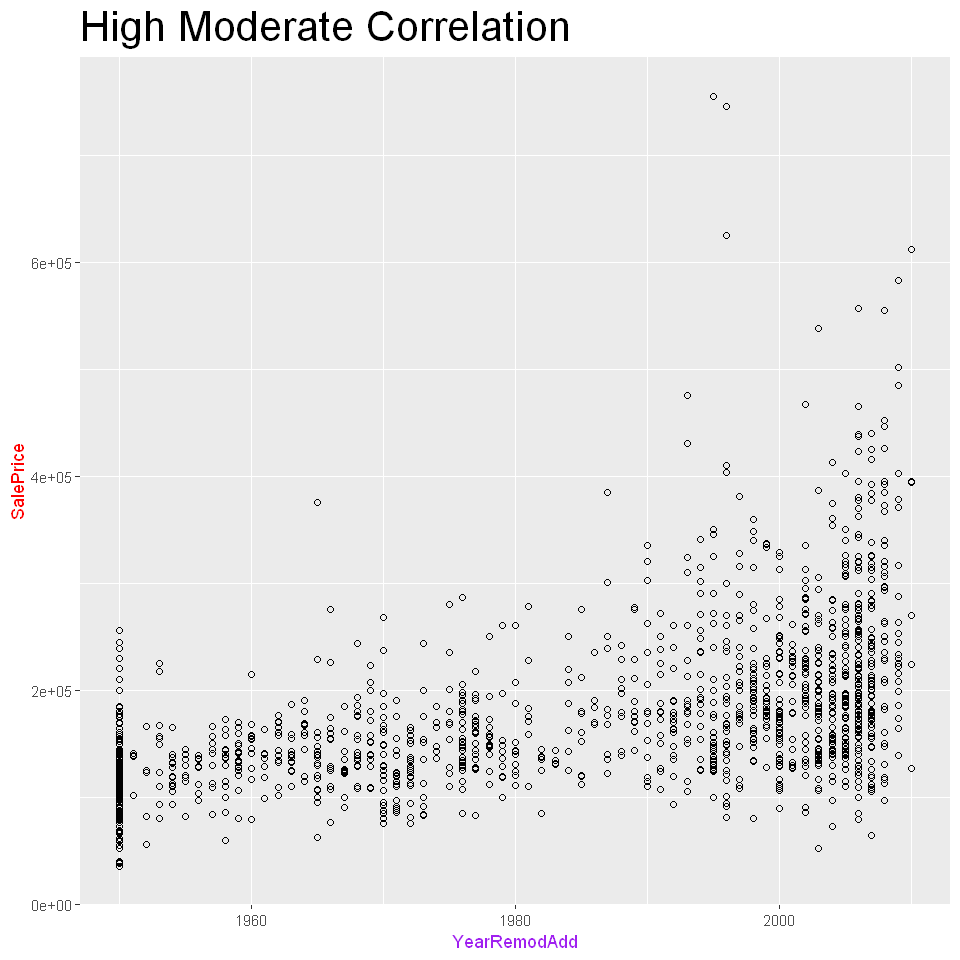

In [122]:
 ggplot(house_num, aes(x=YearRemodAdd, y=SalePrice)) +
    geom_point(shape=1) +
    theme(axis.title.x = element_text(colour = "purple"),
          axis.title.y = element_text(colour = "red"))+
    ggtitle("High Moderate Correlation")+
    labs(y="SalePrice", x = "YearRemodAdd") +
    theme(plot.title = element_text(size=25))

<font size=3> Here we are looking into a Positive but moderate correlation (0.5071). In the first half of the graph, before 1980, we can see that as the year of the remodeling grows, the house price maintains more or less the same. On the second half the situation is different, as the variable `YearRemodAdd` grows, our target `SalesPrice` grows also.</font>

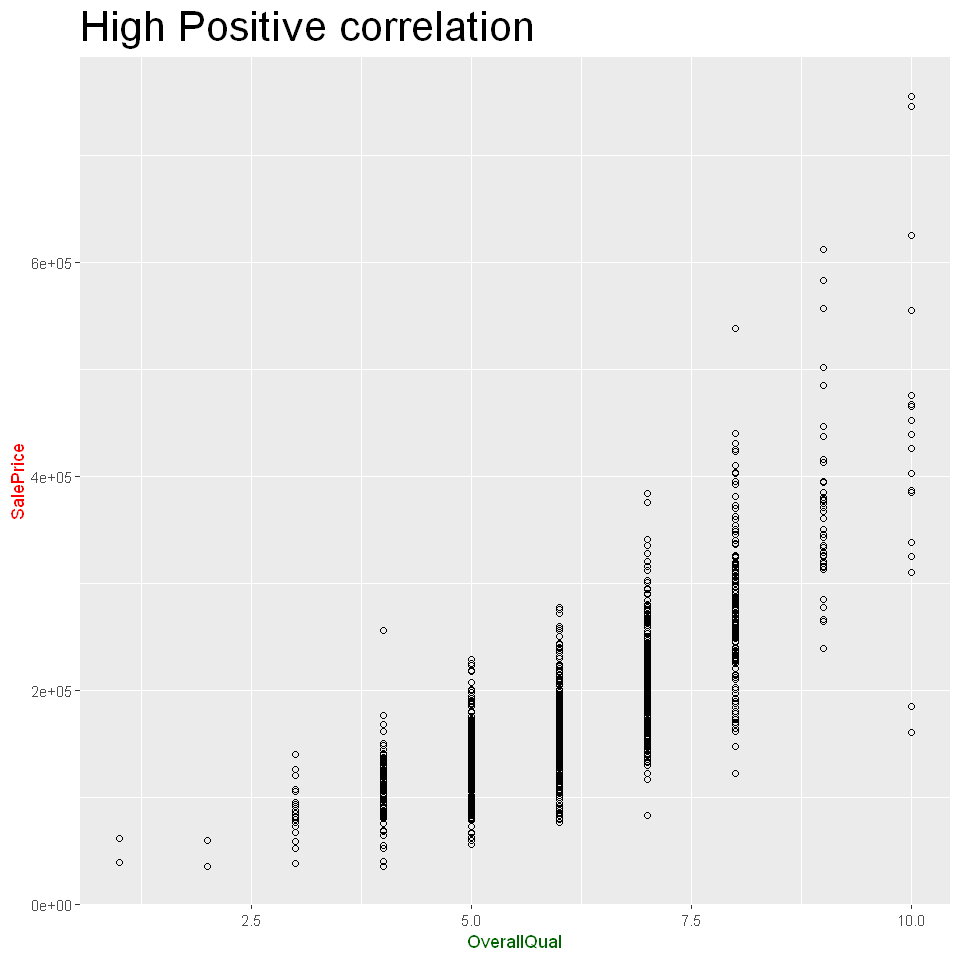

In [123]:
 ggplot(house_num, aes(x=OverallQual, y=SalePrice)) +
    geom_point(shape=1) +
    theme(axis.title.x = element_text(colour = "darkgreen"),
          axis.title.y = element_text(colour = "red"))+
    ggtitle("High Positive correlation")+
    labs(y="SalePrice", x = "OverallQual") +
    theme(plot.title = element_text(size=25))

<font size=3>In this scater plot we have a good example of and high positive correlation. We can see that as the `OveralQual` grows the `SalesPrice` also goes up. The opposite is also true. In this case the two variables have a correlation of 0.791</font>

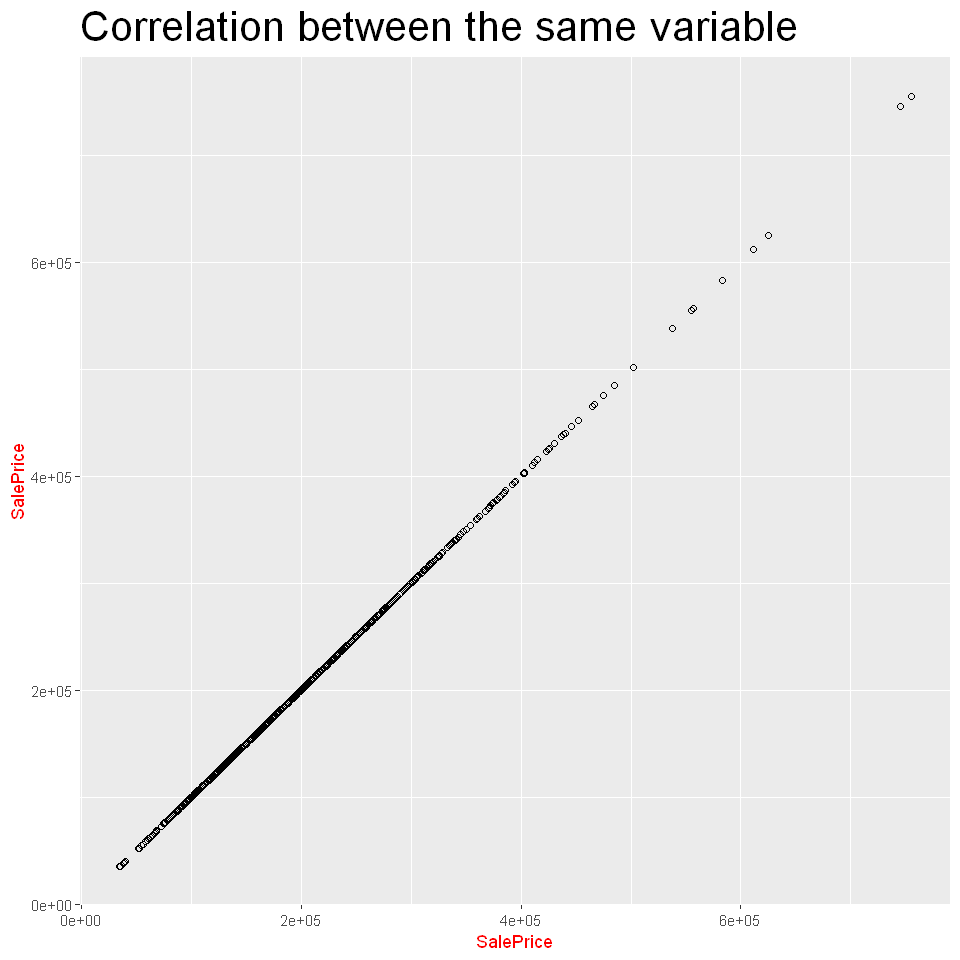

In [125]:
 ggplot(house_num, aes(x=SalePrice, y=SalePrice)) +
    geom_point(shape=1) +
    theme(axis.title.x = element_text(colour = "red"),
          axis.title.y = element_text(colour = "red"))+
    ggtitle("Correlation between the same variable")+
    labs(y="SalePrice", x = "SalePrice") +
    theme(plot.title = element_text(size=25))

<font size=3>When we create a Scatter plot using the variable `SalesPrice` on both axis. We see that the data forms a straight line, with a 45º angle, wich means that the two variables are 100% related.</font> 

<div class="alert alert-block alert-info"> <font size=4> <b> 3.2 First Model</b> </font></div>


In [46]:
fit_num = lm(log(SalePrice) ~ OverallQual + YearRemodAdd +  YearBuilt +
                              WoodDeckSF +  BsmtFinSF1 + TotalBsmtSF + 
                              GrLivArea + GarageCars + Fireplaces + 
                              TotRmsAbvGrd +  WoodDeckSF , data=house)

summary(fit_num)
AIC(fit_num)


Call:
lm(formula = log(SalePrice) ~ OverallQual + YearRemodAdd + YearBuilt + 
    WoodDeckSF + BsmtFinSF1 + TotalBsmtSF + GrLivArea + GarageCars + 
    Fireplaces + TotRmsAbvGrd + WoodDeckSF, data = house)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24999 -0.07704  0.01091  0.09124  0.46316 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.832e+00  5.254e-01   5.391 8.18e-08 ***
OverallQual  9.027e-02  5.110e-03  17.664  < 2e-16 ***
YearRemodAdd 2.445e-03  2.714e-04   9.007  < 2e-16 ***
YearBuilt    1.587e-03  2.052e-04   7.733 1.95e-14 ***
WoodDeckSF   1.582e-04  3.586e-05   4.412 1.10e-05 ***
BsmtFinSF1   7.580e-05  1.123e-05   6.750 2.14e-11 ***
TotalBsmtSF  7.800e-05  1.340e-05   5.823 7.10e-09 ***
GrLivArea    1.638e-04  1.743e-05   9.400  < 2e-16 ***
GarageCars   8.156e-02  7.697e-03  10.596  < 2e-16 ***
Fireplaces   6.620e-02  7.717e-03   8.578  < 2e-16 ***
TotRmsAbvGrd 1.488e-02  4.779e-03   3.114  0.00188 ** 
---
Signif. co

[1] -1171.014

<font size=3>
We can say the following about <b>fit_num</b>:
<br>
<ul>
    <li><b>R-squared</b> is 0.838, which is good, because we want it to be close to 1.</li>
    <li><b>AIC</b> is a negative value. The AIC is only used to compare models. The lowest the AIC better the model.</li>
    <li> All the variables are significant</li>
</ul>
</font>

<div class="alert alert-block alert-info"> <font size=4> <b> 3.3 Outliers Study</b> </font></div>

<br>

<font size=3> Our regression model fits the data that it receives as input. If some of those data points don´t are <b>outliers</b>, our model is going to be influenced by them. So to make sure this problem doesn´t happen in large scale, we are going to check the most influencial values and remove them. </font>

<br>

NULL

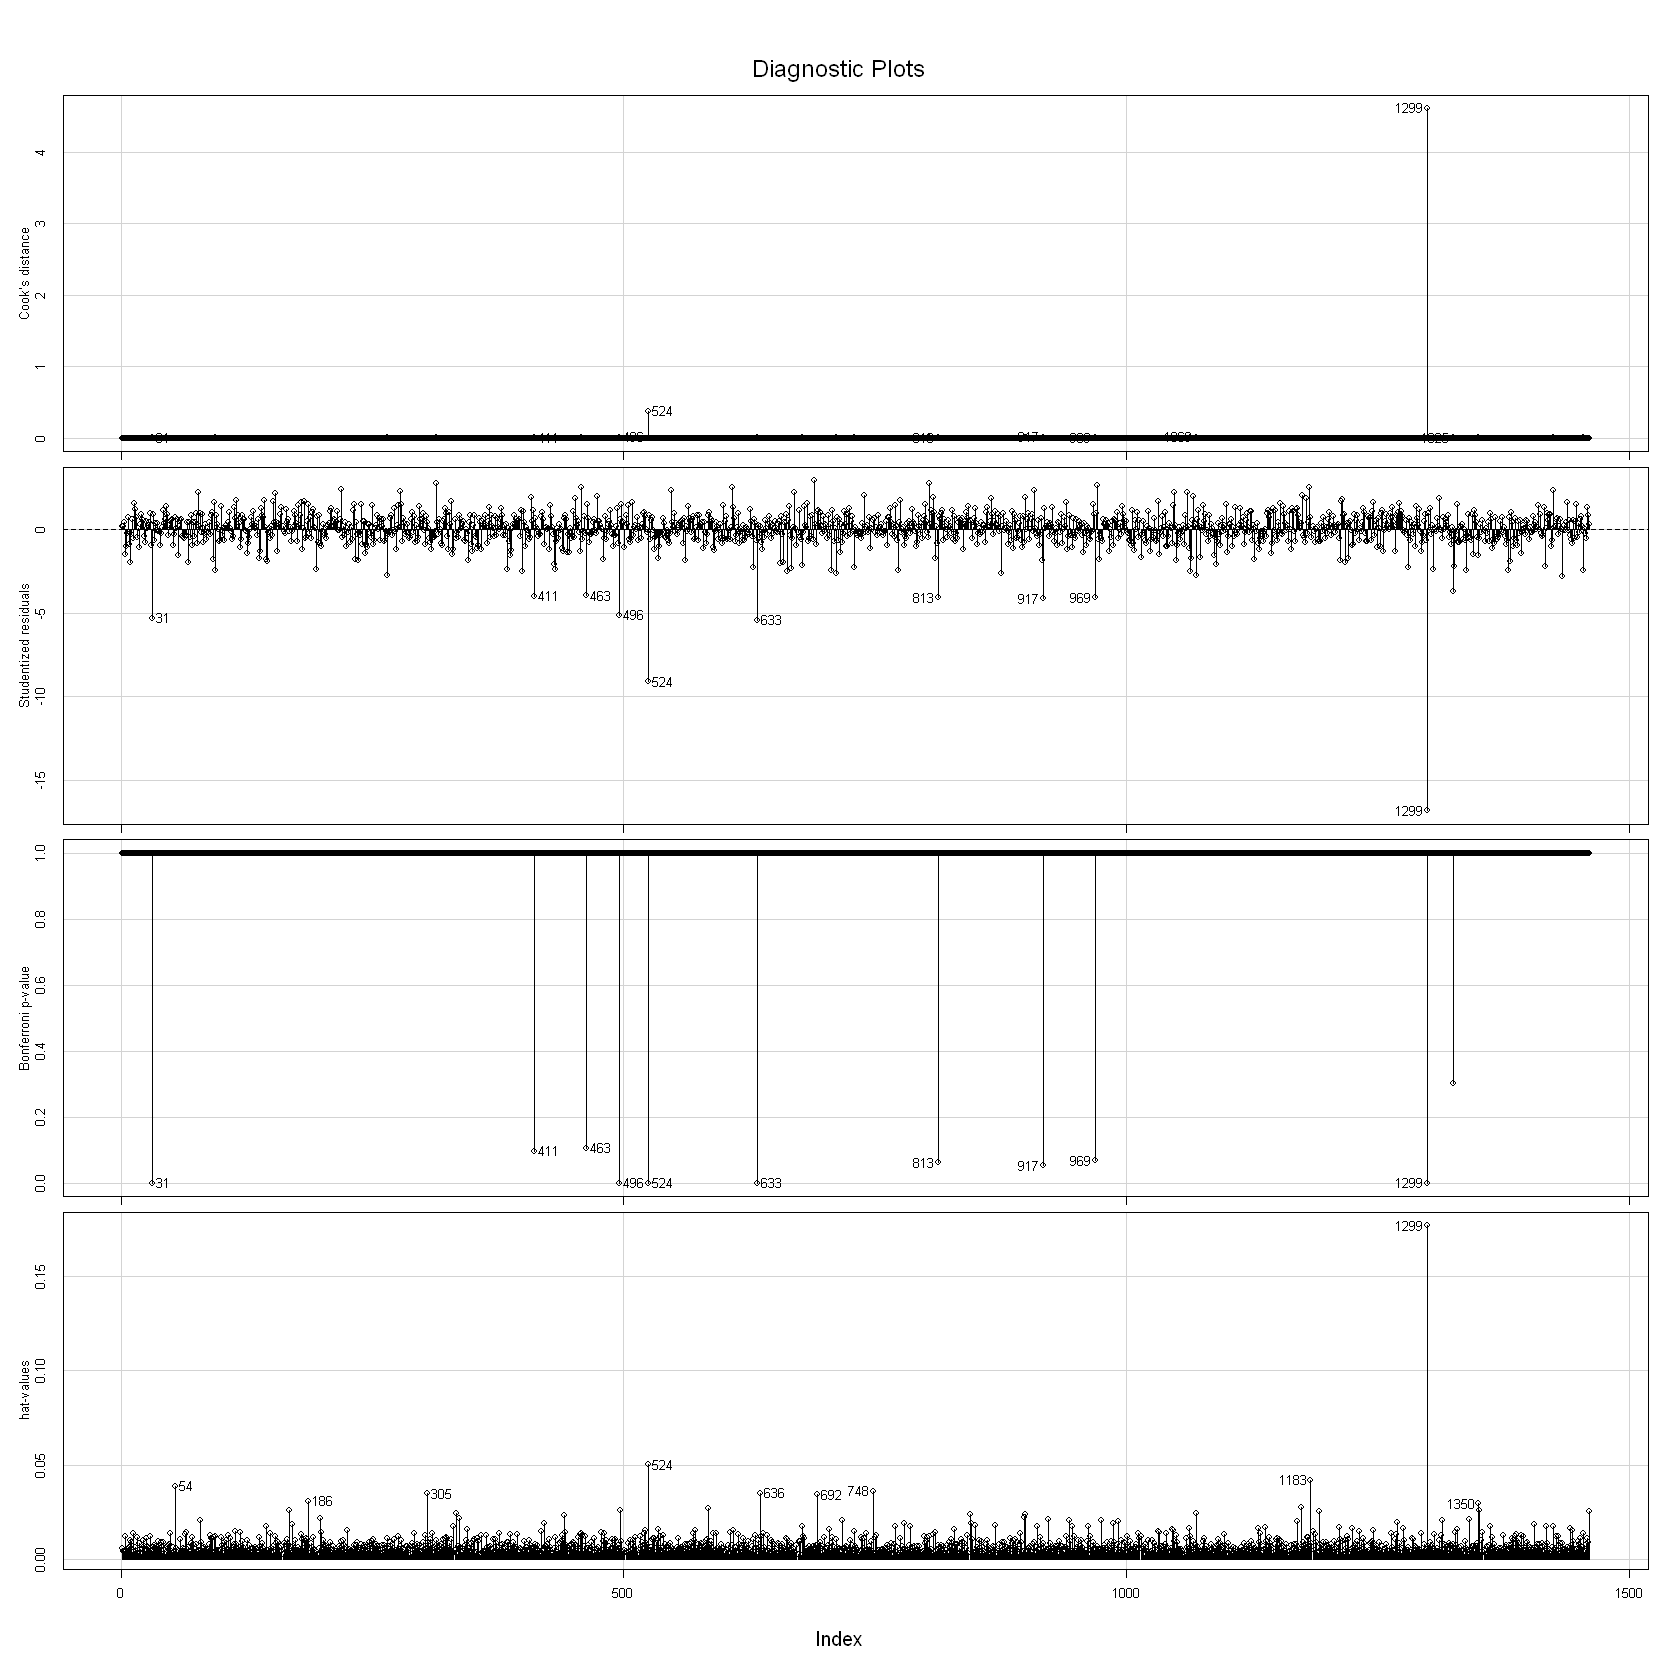

In [51]:
# set plot size
options(repr.plot.width=14, repr.plot.height=14)

# 10 Most influential values 
influenceIndexPlot(fit_num, id=list(n=10))


<font size=3> This graph shows us the 10 most influential observations to the model, using four different measures. Given this, I will select the values that are repeated at least 3 times throughout the 4 graphs: </font>
<br>
<ul>
    <li> 31;</li>
    <li> 411;</li>
    <li> 496;</li>
    <li> 524;</li>
    <li> 813;</li>    
    <li> 917;</li> 
    <li> 969;</li>
    <li> 1299; </li>
</ul>

In [61]:
# remove the 8 most influential values
house_cleaned = house[c(-31, -411, -496, -524, -813, -917, -969, -1299),]

# number of deleted rows
length(house[,1]) - length(house_cleaned[,1])

[1] 8

<div class="alert alert-block alert-info"> <font size=4> <b> 3.4 Numeric Model with Cleaned Data</b> </font></div>

<br>

<font size=3> Now that we've deleted the 8 most influential observations to the model, we can rerun the model by  giving the `house_cleaned` dataframe as input. This way we can compare both models. </font>

<br>

In [70]:
fit_num2 = lm(log(SalePrice) ~ OverallQual + YearRemodAdd +  YearBuilt +
                              WoodDeckSF +  BsmtFinSF1 + TotalBsmtSF + 
                              GrLivArea + GarageCars + Fireplaces + 
                              TotRmsAbvGrd +  WoodDeckSF , data=house_cleaned)

summary(fit_num2)
AIC(fit_num2)


Call:
lm(formula = log(SalePrice) ~ OverallQual + YearRemodAdd + YearBuilt + 
    WoodDeckSF + BsmtFinSF1 + TotalBsmtSF + GrLivArea + GarageCars + 
    Fireplaces + TotRmsAbvGrd + WoodDeckSF, data = house_cleaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87426 -0.06970  0.00808  0.07922  0.47227 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.038e+00  4.358e-01   6.969 4.84e-12 ***
OverallQual  7.921e-02  4.261e-03  18.591  < 2e-16 ***
YearRemodAdd 2.306e-03  2.251e-04  10.244  < 2e-16 ***
YearBuilt    1.626e-03  1.700e-04   9.569  < 2e-16 ***
WoodDeckSF   1.067e-04  2.976e-05   3.584 0.000349 ***
BsmtFinSF1   1.086e-04  9.460e-06  11.477  < 2e-16 ***
TotalBsmtSF  1.296e-04  1.133e-05  11.443  < 2e-16 ***
GrLivArea    2.538e-04  1.495e-05  16.982  < 2e-16 ***
GarageCars   6.238e-02  6.440e-03   9.686  < 2e-16 ***
Fireplaces   5.252e-02  6.420e-03   8.180 6.14e-16 ***
TotRmsAbvGrd 6.311e-04  4.004e-03   0.158 0.874771    
---
Si

[1] -1713.807

<font size=3>
We can say the following about <b>fit_num2</b>:
<br>
<ul>
    <li><b>R-squared</b> is 0.838, what means that by removing the outliers our r-squared add an increase of 4,6%.</li>
    <li>The <b>AIC</b> is -1713.80, way lower than the previous model's AIC (-1171.01)</li>
    <li> All the variables continue significant except the TotRmsAbvGrd, that as a p-value of 0.87, because of this we are going to take it out on the model. </li>
</ul>
</font>

In [71]:
fit_num3 = lm(log(SalePrice) ~ OverallQual + YearRemodAdd +  YearBuilt +
                              WoodDeckSF +  BsmtFinSF1 + TotalBsmtSF + 
                              GrLivArea + GarageCars + Fireplaces + 
                              WoodDeckSF , data=house_cleaned)

summary(fit_num3)
AIC(fit_num3)


Call:
lm(formula = log(SalePrice) ~ OverallQual + YearRemodAdd + YearBuilt + 
    WoodDeckSF + BsmtFinSF1 + TotalBsmtSF + GrLivArea + GarageCars + 
    Fireplaces + WoodDeckSF, data = house_cleaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87425 -0.06930  0.00816  0.07909  0.47301 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.042e+00  4.347e-01   6.998 3.96e-12 ***
OverallQual  7.916e-02  4.249e-03  18.631  < 2e-16 ***
YearRemodAdd 2.305e-03  2.250e-04  10.247  < 2e-16 ***
YearBuilt    1.626e-03  1.698e-04   9.571  < 2e-16 ***
WoodDeckSF   1.065e-04  2.974e-05   3.582 0.000352 ***
BsmtFinSF1   1.084e-04  9.373e-06  11.563  < 2e-16 ***
TotalBsmtSF  1.296e-04  1.132e-05  11.446  < 2e-16 ***
GrLivArea    2.556e-04  9.561e-06  26.734  < 2e-16 ***
GarageCars   6.242e-02  6.433e-03   9.702  < 2e-16 ***
Fireplaces   5.244e-02  6.401e-03   8.193 5.57e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual

[1] -1715.782

<font size=3>The r-squared did not change, but the AIC got a little lower, or in other words, better.</font>

<div class="alert alert-block alert-info"> <font size=4> <b> 3.5 Numeric Model Predictions </b> </font></div>

<br>

<font size=3> Now we are going to predict using the 3 models and pick the one that has the best `RMSLE`. </font>

<br>

In [100]:
actual_num = house$SalePrice
predicted_num = exp(predict(fit_num, data=house))

# Mean Average Percentage Error
MAPE_num = mape(predicted_num, actual_num)
MAPE_num

# Root Mean Square Logaritmic Error
RMSLE_num = rmsle(actual_num, predicted_num)
RMSLE_num

[1] 0.1072419

[1] 0.1607031

<font size=3>
<b>MAPE = </b> 10,72%
<p><b>RMSLE = </b> 16,07%</p>
</font>

In [68]:
actual_num2 = house_cleaned$SalePrice
predicted_num2 = exp(predict(fit_num2, data=house_cleaned))

# Mean Average Percentage Error
MAPE_num2 = mape(predicted_num2, actual_num2)
MAPE_num2

# Root Mean Square Logaritmic Error
RMSLE_num2 = rmsle(actual_num2, predicted_num2)
RMSLE_num2

[1] 0.09807477

[1] 0.1330056

<font size=3>
<b>MAPE2 = </b> 9,81%
<p><b>RMSLE2 = </b> 13,30%</p>
</font>

In [69]:
actual_num3 = house_cleaned$SalePrice
predicted_num3 = exp(predict(fit_num3, data=house_cleaned))

# Mean Average Percentage Error
MAPE_num3 = mape(predicted_num3, actual_num3)
MAPE_num3

# Root Mean Square Logaritmic Error
RMSLE_num3 = rmsle(actual_num3, predicted_num3)
RMSLE_num3

[1] 0.09806783

[1] 0.1330067

<font size=3>
<b>MAPE3 = </b> 9,81%
<p><b>RMSLE3 = </b> 13,30%</p>
</font>

<font size=3>Although the model that present the best RMSLE is the `fit_num2` I am going to choose the `fit_num3`. This is because all the variables of the model `fit_num3` are significant and the difference is so small that I prefere it this way (less variables, but all significant). </font>  

<div class="alert alert-block alert-info"> <font size=4> <b> 3.6 Best Model Prediction's Graph </b> </font></div>

<br>


In [ ]:
# set plot size
options(repr.plot.width=14, repr.plot.height=14)

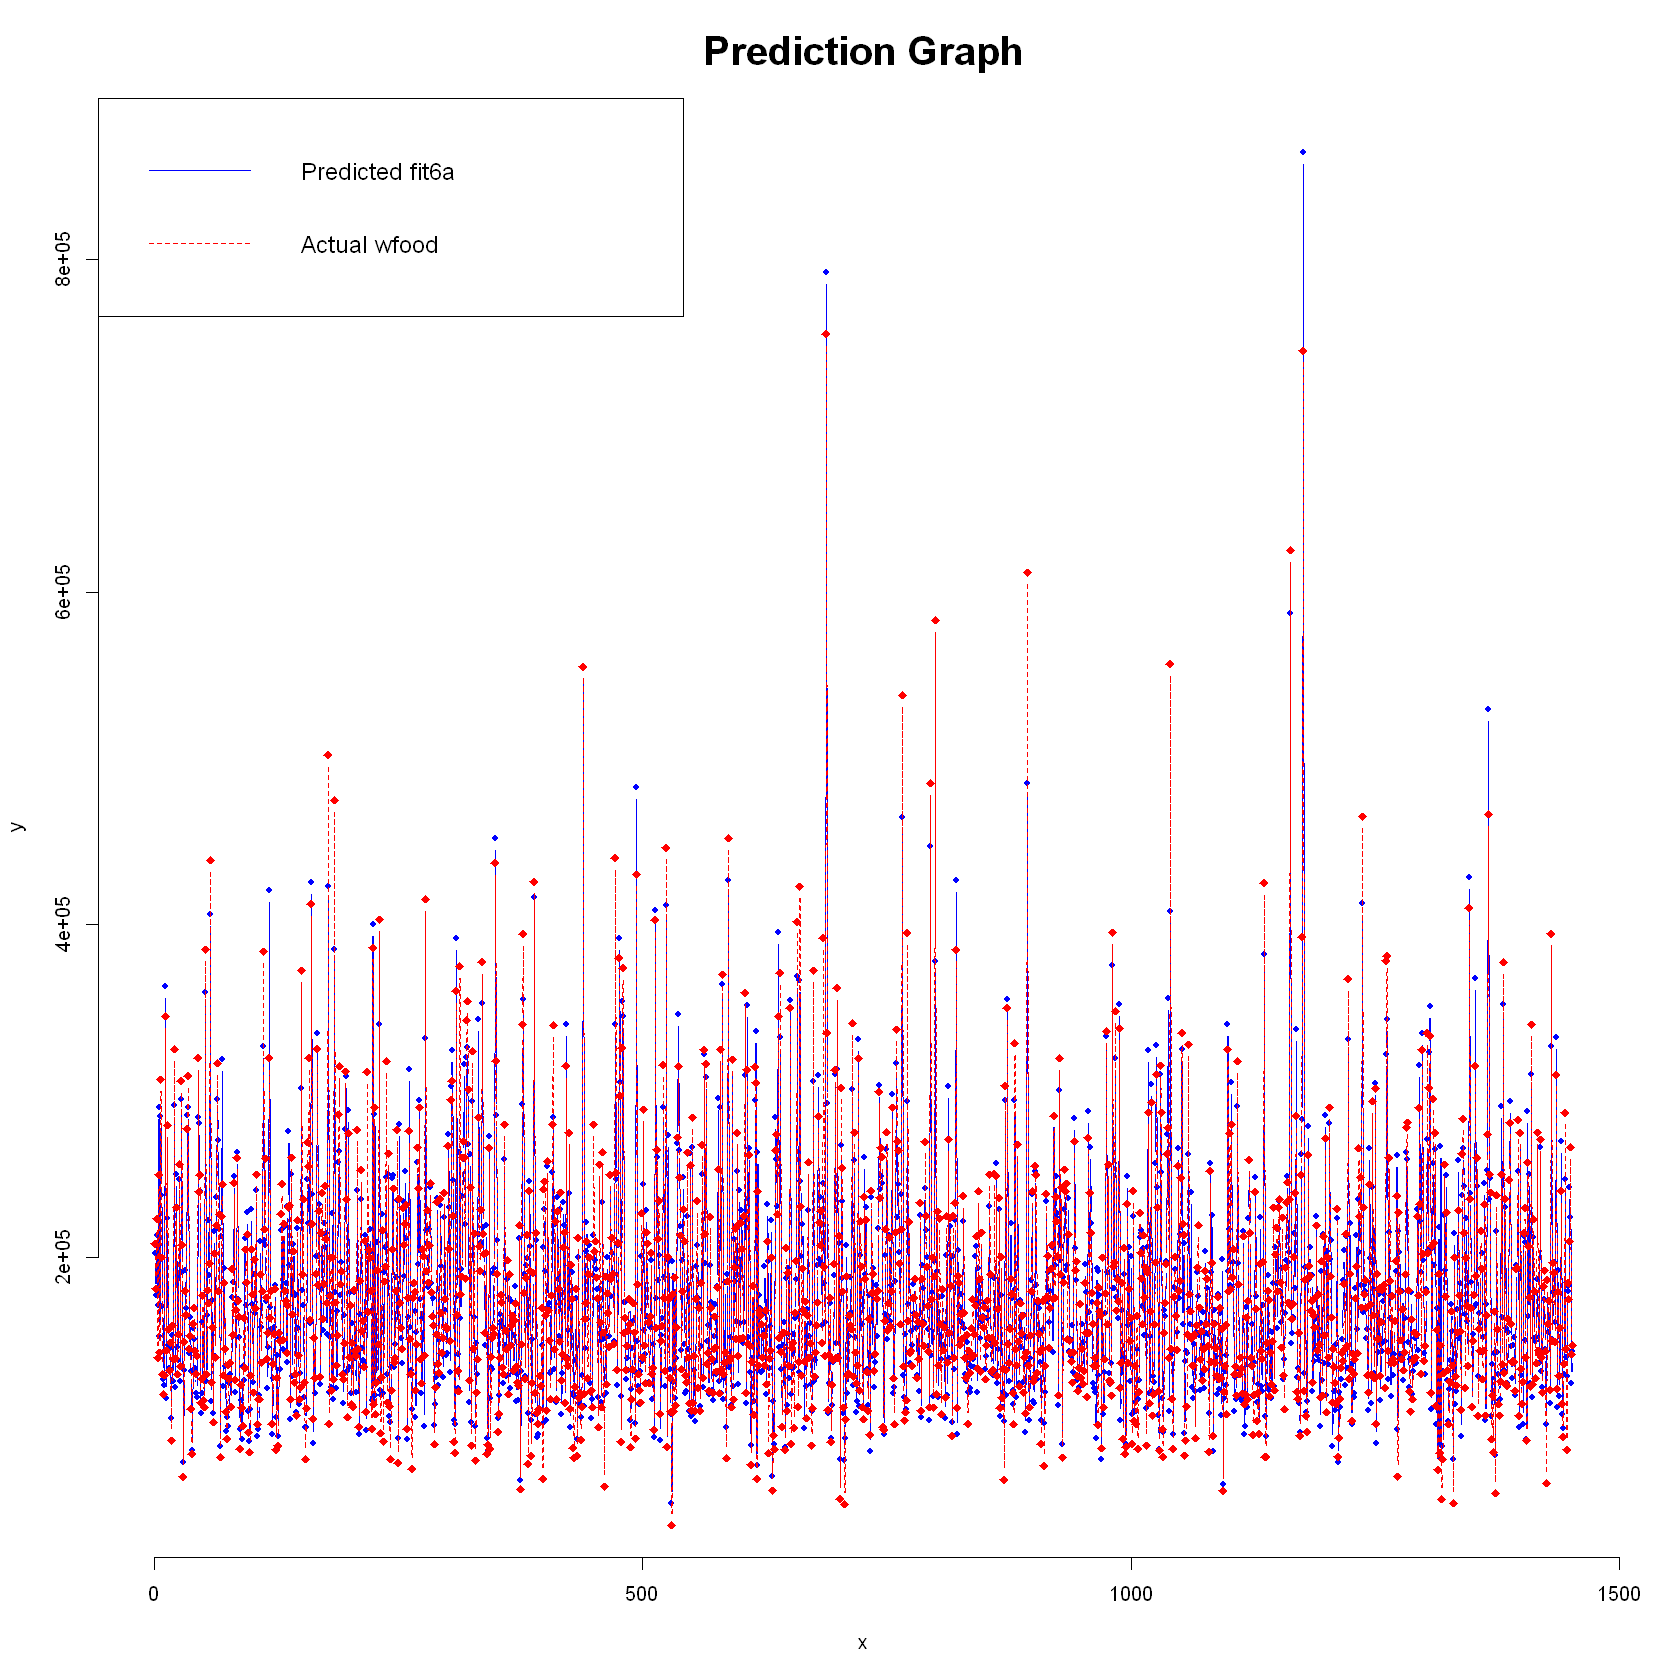

In [112]:
plot(predicted_num2, type = "b", frame = FALSE, pch = 20, col = "blue", xlab = "x", ylab = "y",
      main="Prediction Graph", cex.main=2)

lines(actual_num2, pch = 18, col = "red", type = "b", lty = 2)

legend("topleft", legend=c("Predicted fit_num2", "Actual SalesPrice"), col=c("blue", "red"), lty = 1:2, cex=1.2)

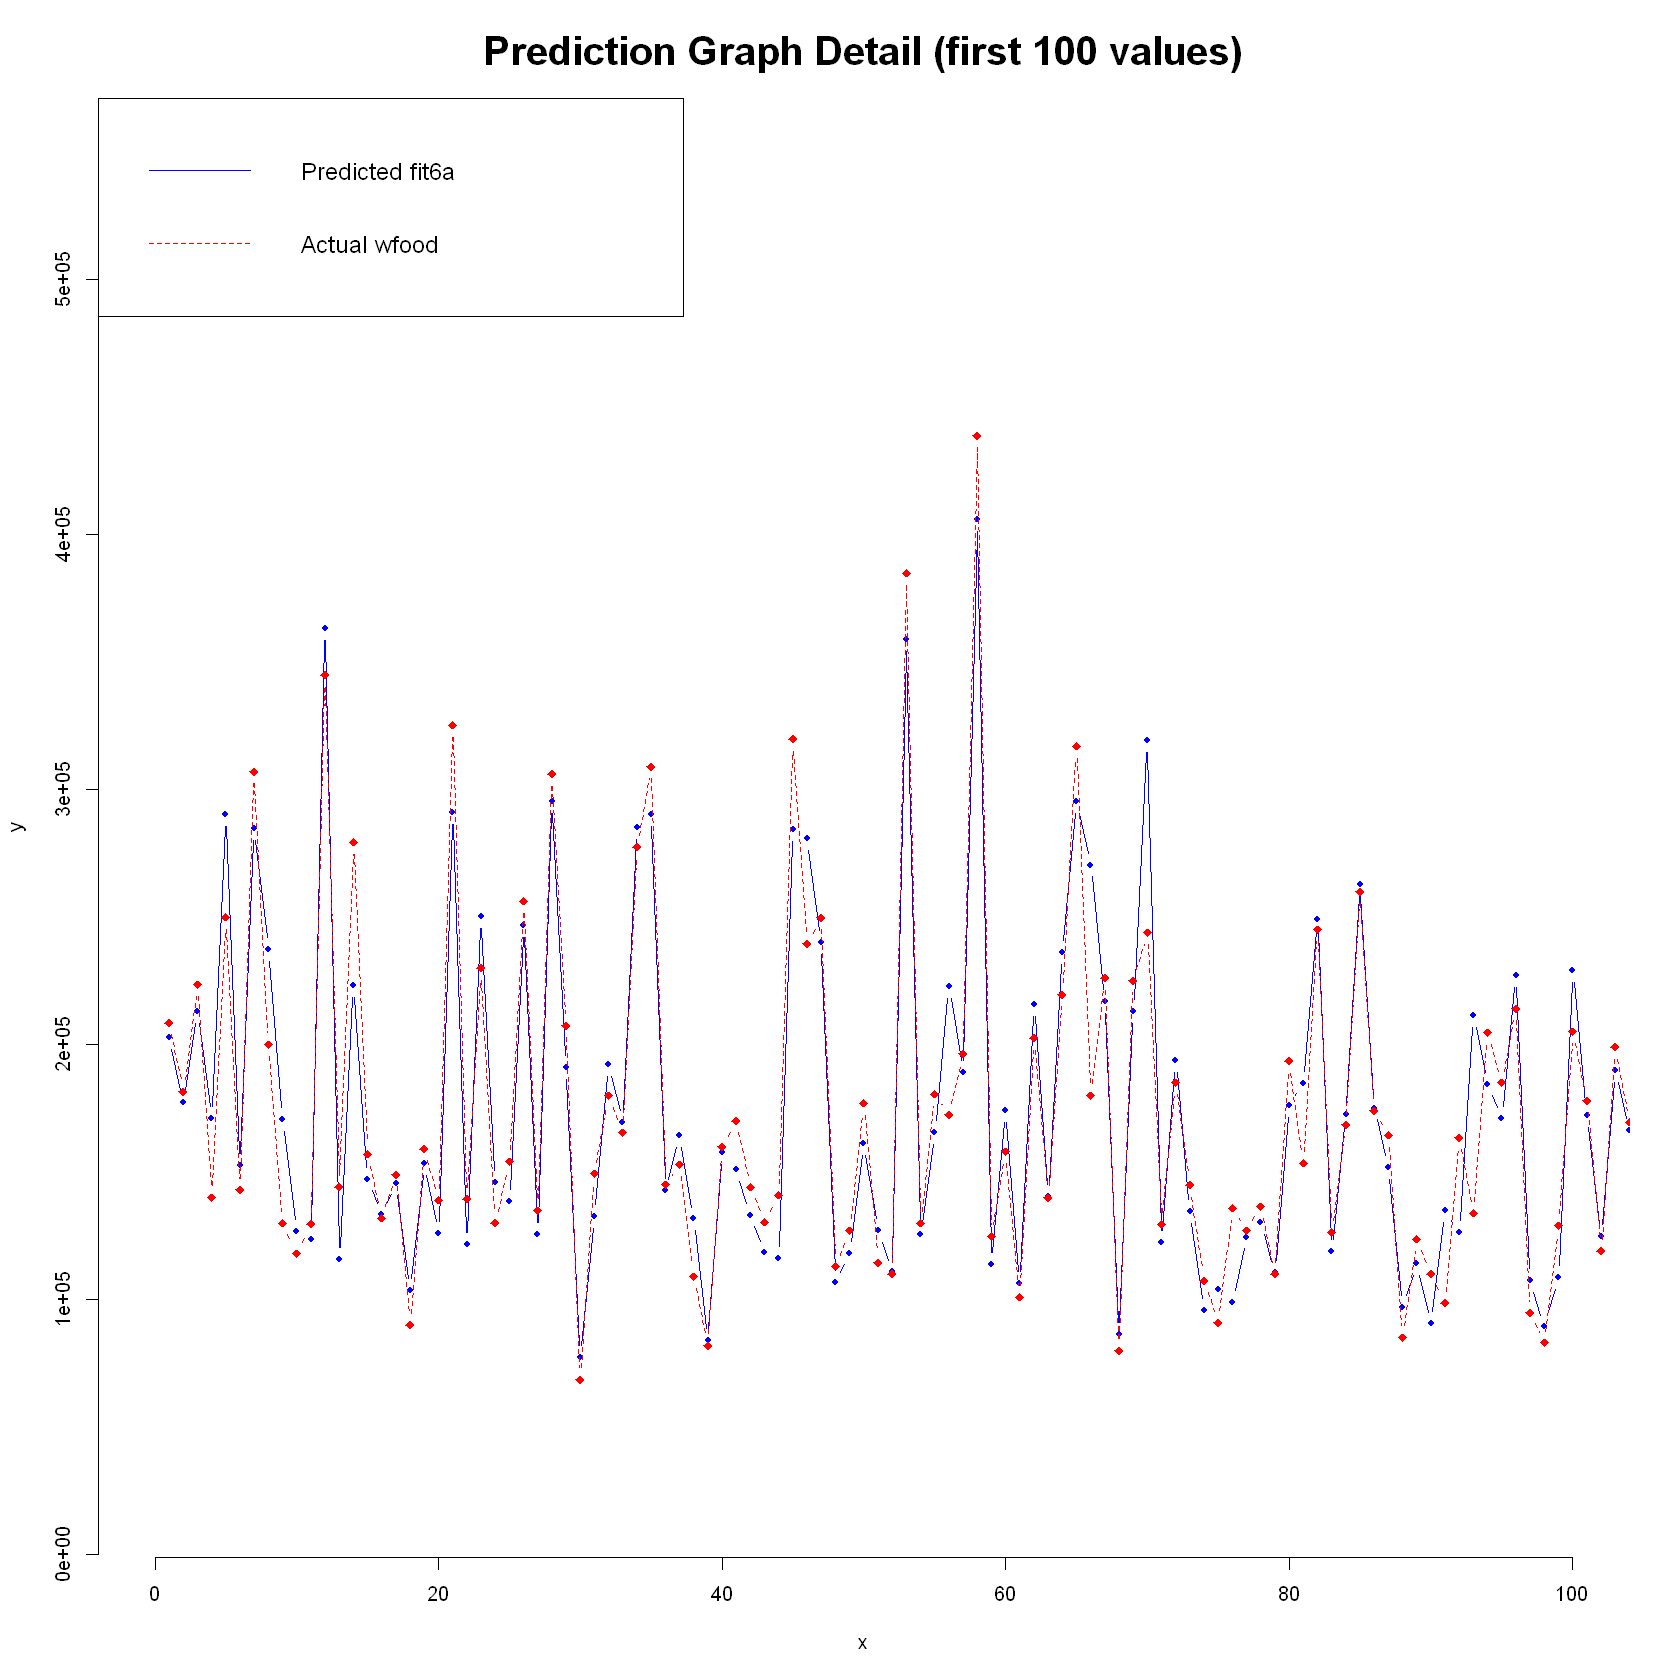

In [111]:
plot(predicted_num2, type = "b", frame = FALSE, pch = 20, col = "blue", xlab = "x", ylab = "y",
      xlim=c(0, 100), ylim=c(20000,550000), main="Prediction Graph Detail (first 100 values)", cex.main=2)

lines(actual_num2, pch = 18, col = "red", type = "b", lty = 2, xlim= c(0, 100), ylim=c(20000,550000))

legend("topleft", legend=c("Predicted fit6_num2", "Actual SalesPrice"), col=c("blue", "red"), lty = 1:2, cex=1.2)

<div class="alert alert-block alert-info"> <font size=5> <b> 4. Factor Model</b> </font></div>
<br>

<font size=3> Now we will use some of the factor variables to predict the target variable. The decision of each variables to include in the model is going to be based on the existance of <b>NA</b> values, the significanse level and the description of the variable. From now on we are going to use the dataframe `house_cleaned` as input to all models.</font>


In [131]:
# all the factor variables 
house_factor = select_if(house, is.factor)

# remove columns that have NA
house_factor = house_factor[ , colSums(is.na(house_factor)) == 0]

str(house_factor)

'data.frame':	1460 obs. of  27 variables:
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..: 6 25 6 7 14 12 21 17 18 4 ...
 $ Condition1   : Factor w/ 9 levels "Artery","Feedr",..: 3 2 3 3 3 3 3 5 1 1 ...
 $ Condition2   : Factor w/ 8 levels "Artery","Feedr",..: 3 3 3 3 3 3 3 3 3 1 ...
 $ BldgType     : Factor w/ 5 levels "1Fam","2fmCon",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ HouseStyle   : Factor w/ 8 levels "1.5Fin","1.5Unf",

<div class="alert alert-block alert-info"> <font size=4> <b> 4.1 Modeling </b> </font></div>

<br>


In [ ]:
fit_factor = lm(log(SalePrice) ~ RoofMatl + Foundation + Exterior1st + Neighborhood +
                                 MSZoning + LotShape +  KitchenQual + BldgType + 
                                 SaleCondition + CentralAir + PavedDrive + Heating +
                                 RoofStyle + LandSlope + Functional + SaleCondition + 
                                 SaleType + Utilities + ExterQual + ExterCond, data=house_cleaned)

summary(fit_factor)
AIC(fit_factor, fit_num)

<font size=3>
We can say the following about <b>fit_factor</b>:

<ul>
    <li><b>R-squared</b> is 0.7806, which is good, because we want it to be close to 1;</li>
    <li><b>AIC</b> is a negative value. Comparing with the `fit_num` model we can conclude that the 
        the factor is not as good as the numeric;</li>
    <li> There are many non-significant factor levels. </li>
</ul>
</font>    

<div class="alert alert-block alert-info"> <font size=4> <b> 4.2 Factor Model Prediction </b> </font></div>

<br>


In [138]:
actual1 = house_cleaned$SalePrice
predicted1 = exp(predict(fit_factor, data=house_cleaned))


MAPE_factor = mape(predicted1, actual1)
MAPE_factor

RMSLE_factor = rmsle(actual1, predicted1)
RMSLE_factor

[1] 0.1433488

[1] 0.1829087

<font size=3>
<b>MAPE = </b> 14,33%
<p><b>RMSLE = </b> 18,29%</p>
</font>

<div class="alert alert-block alert-info"> <font size=4> <b> 4.3 Factor Model Prediction's Graph </b> </font></div>

<br>

In [141]:
# set plot size
options(repr.plot.width=14, repr.plot.height=14)

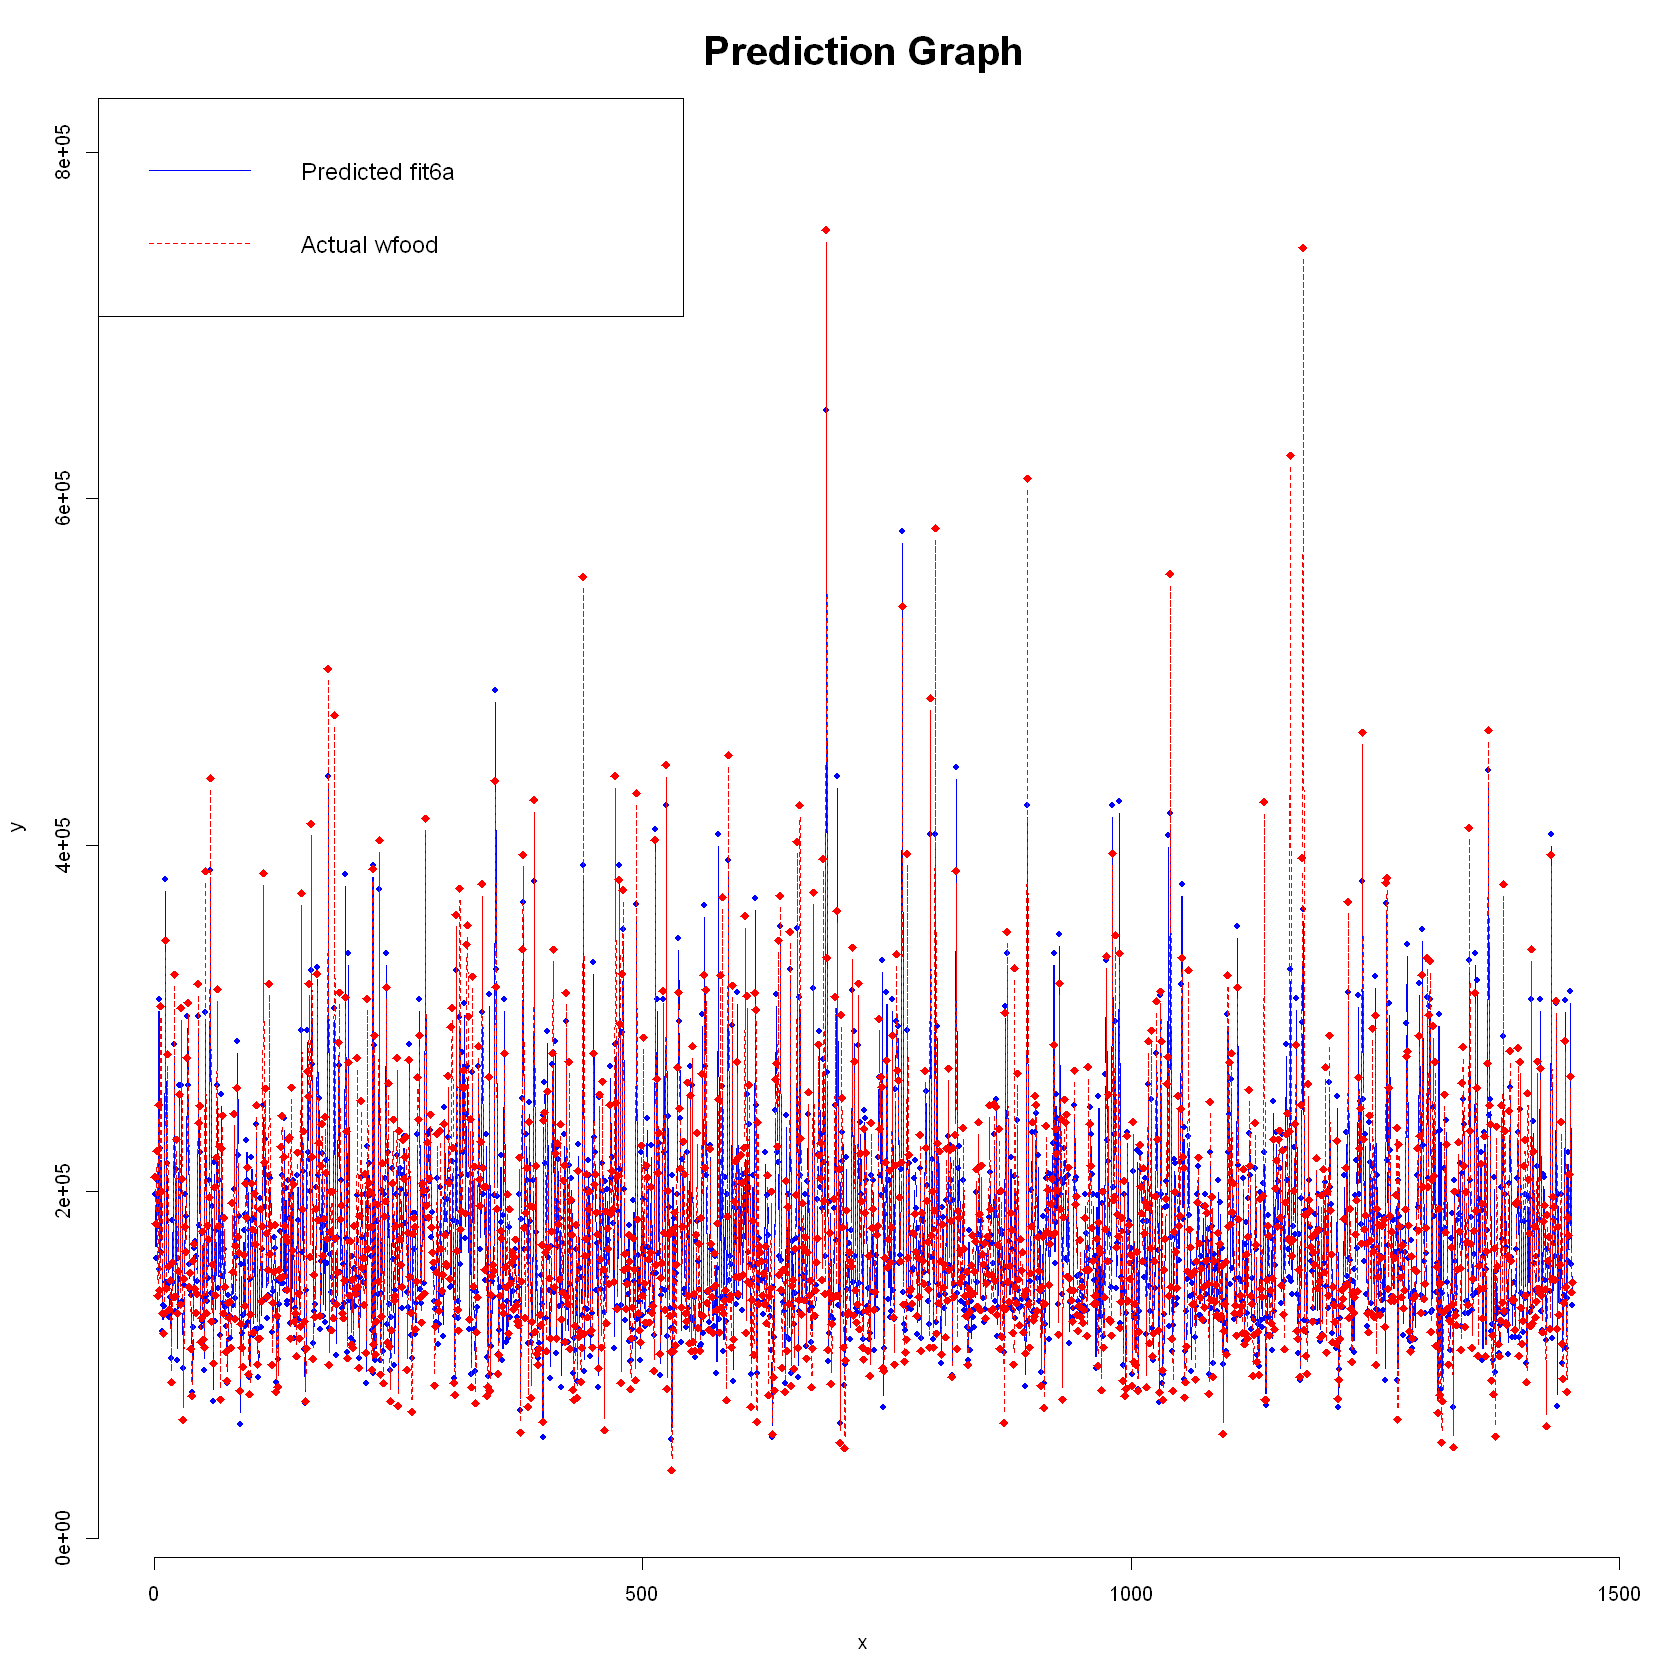

In [148]:
plot(predicted1, type = "b", frame = FALSE, pch = 20, col = "blue", xlab = "x", ylab = "y",
      main="Prediction Graph", cex.main=2, ylim=c(20000,800000))

lines(actual1, pch = 18, col = "red", type = "b", lty = 2)

legend("topleft", legend=c("Predicted fit_factor", "Actual SalesPrice"), col=c("blue", "red"), lty = 1:2, cex=1.2)

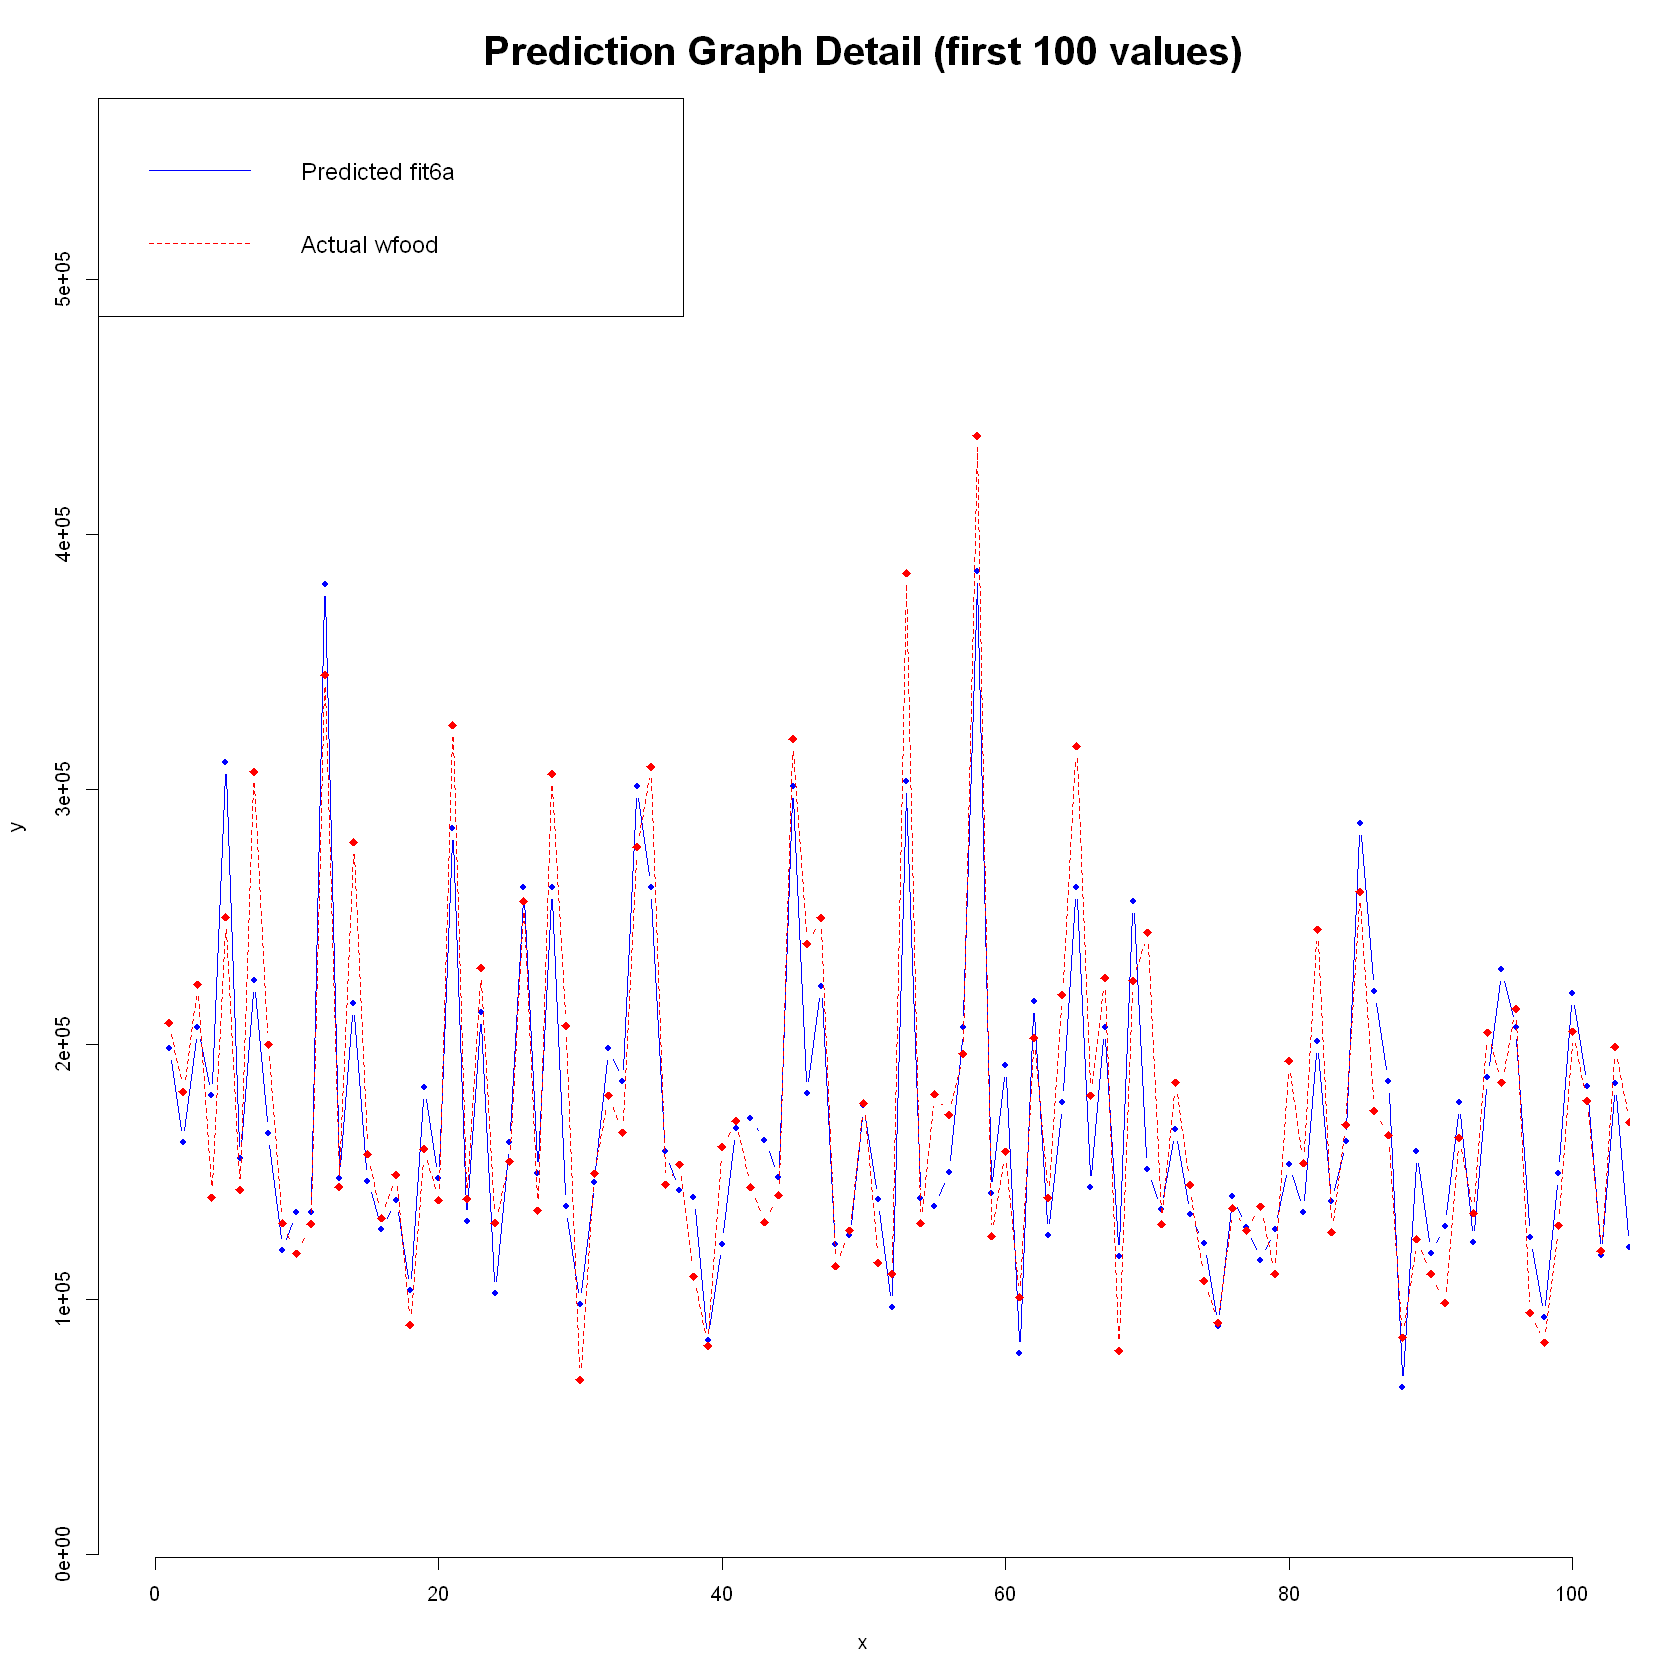

In [143]:
plot(predicted1, type = "b", frame = FALSE, pch = 20, col = "blue", xlab = "x", ylab = "y",
      xlim=c(0, 100), ylim=c(20000,550000), main="Prediction Graph Detail (first 100 values)", cex.main=2)

lines(actual1, pch = 18, col = "red", type = "b", lty = 2, xlim= c(0, 100), ylim=c(20000,550000))

legend("topleft", legend=c("Predicted fit_factor", "Actual SalesPrice"), col=c("blue", "red"), lty = 1:2, cex=1.2)

<div class="alert alert-block alert-info"> <font size=5> <b> 5. Mixed model</b> </font></div>
<br>
<font size=3>Now that we have built the two models (numeric and factor) we can merge them into one single model. This new model is going to be called <b>mixed model</b>. This model is going to be more complete, so the errors are going to be smaller.</font>

<div class="alert alert-block alert-info"> <font size=4> <b> 5.1 Modeling</b> </font></div>
<br>

In [151]:
fit_mixed = lm(log(SalePrice) ~ RoofMatl + Foundation + Exterior1st + Neighborhood +
                                 MSZoning + LotShape +  KitchenQual + BldgType + 
                                 SaleCondition + CentralAir + PavedDrive + Heating +
                                 RoofStyle + LandSlope + Functional + SaleCondition + 
                                 SaleType + Utilities + ExterQual + ExterCond + OverallQual +
                                 YearRemodAdd +  YearBuilt + BsmtFinSF1 +
                                 WoodDeckSF +  BsmtFinSF1 + TotalBsmtSF + 
                                 GrLivArea + GarageCars + Fireplaces + 
                                 TotRmsAbvGrd +  WoodDeckSF, data=house_cleaned)

fit_mixed
AIC(fit_mixed, fit_factor, fit_num)

summary(fit_mixed)$r.squared


Call:
lm(formula = log(SalePrice) ~ RoofMatl + Foundation + Exterior1st + 
    Neighborhood + MSZoning + LotShape + KitchenQual + BldgType + 
    SaleCondition + CentralAir + PavedDrive + Heating + RoofStyle + 
    LandSlope + Functional + SaleCondition + SaleType + Utilities + 
    ExterQual + ExterCond + OverallQual + YearRemodAdd + YearBuilt + 
    BsmtFinSF1 + WoodDeckSF + BsmtFinSF1 + TotalBsmtSF + GrLivArea + 
    GarageCars + Fireplaces + TotRmsAbvGrd + WoodDeckSF, data = house_cleaned)

Coefficients:
         (Intercept)       RoofMatlMembran         RoofMatlMetal  
           4.204e+00             2.005e-01            -2.126e-02  
        RoofMatlRoll       RoofMatlTar&Grv       RoofMatlWdShake  
          -4.490e-03            -9.875e-03            -2.952e-02  
     RoofMatlWdShngl      FoundationCBlock       FoundationPConc  
           7.705e-02             1.693e-02             1.170e-02  
      FoundationSlab       FoundationStone        FoundationWood  
          -3.137

,df,AIC
,<dbl>,<dbl>
fit_mixed,117,-2211.3310
fit_factor,107,-598.6057
fit_num,12,-1713.8070


[1] 0.928736

<font size=3>
We can say the following about <b>fit_mixed</b>:

<ul>
    <li><b>AIC</b> is now -2211.3310. This model is By far best one regarding the AIC value.</li>
    <li><b>R-squared</b> is 0.9287, this is a very good value. It means that almost 93% of the target variable is explained by the independent variables. </li>
</ul>
</font>    

<div class="alert alert-block alert-info"> <font size=4> <b> 5.2 Mixed Model Prediction </b> </font></div>

<br>

In [158]:
actual1 = house_cleaned$SalePrice
predicted1 = exp(predict(fit_mixed, data=house_cleaned))

MAPE_mixed = mape(predicted1, actual1)
MAPE_mixed

RMSLE_mixed = rmsle(actual1, predicted1)
RMSLE_mixed

[1] 0.0752154

[1] 0.104246

<font size=3>
<b>MAPE = </b> 7,52%
<p><b>RMSLE = </b> 10,42%</p>
</font>

<div class="alert alert-block alert-info"> <font size=4> <b> 5.3 Mixed Model Prediction's Graph </b> </font></div>

<br>

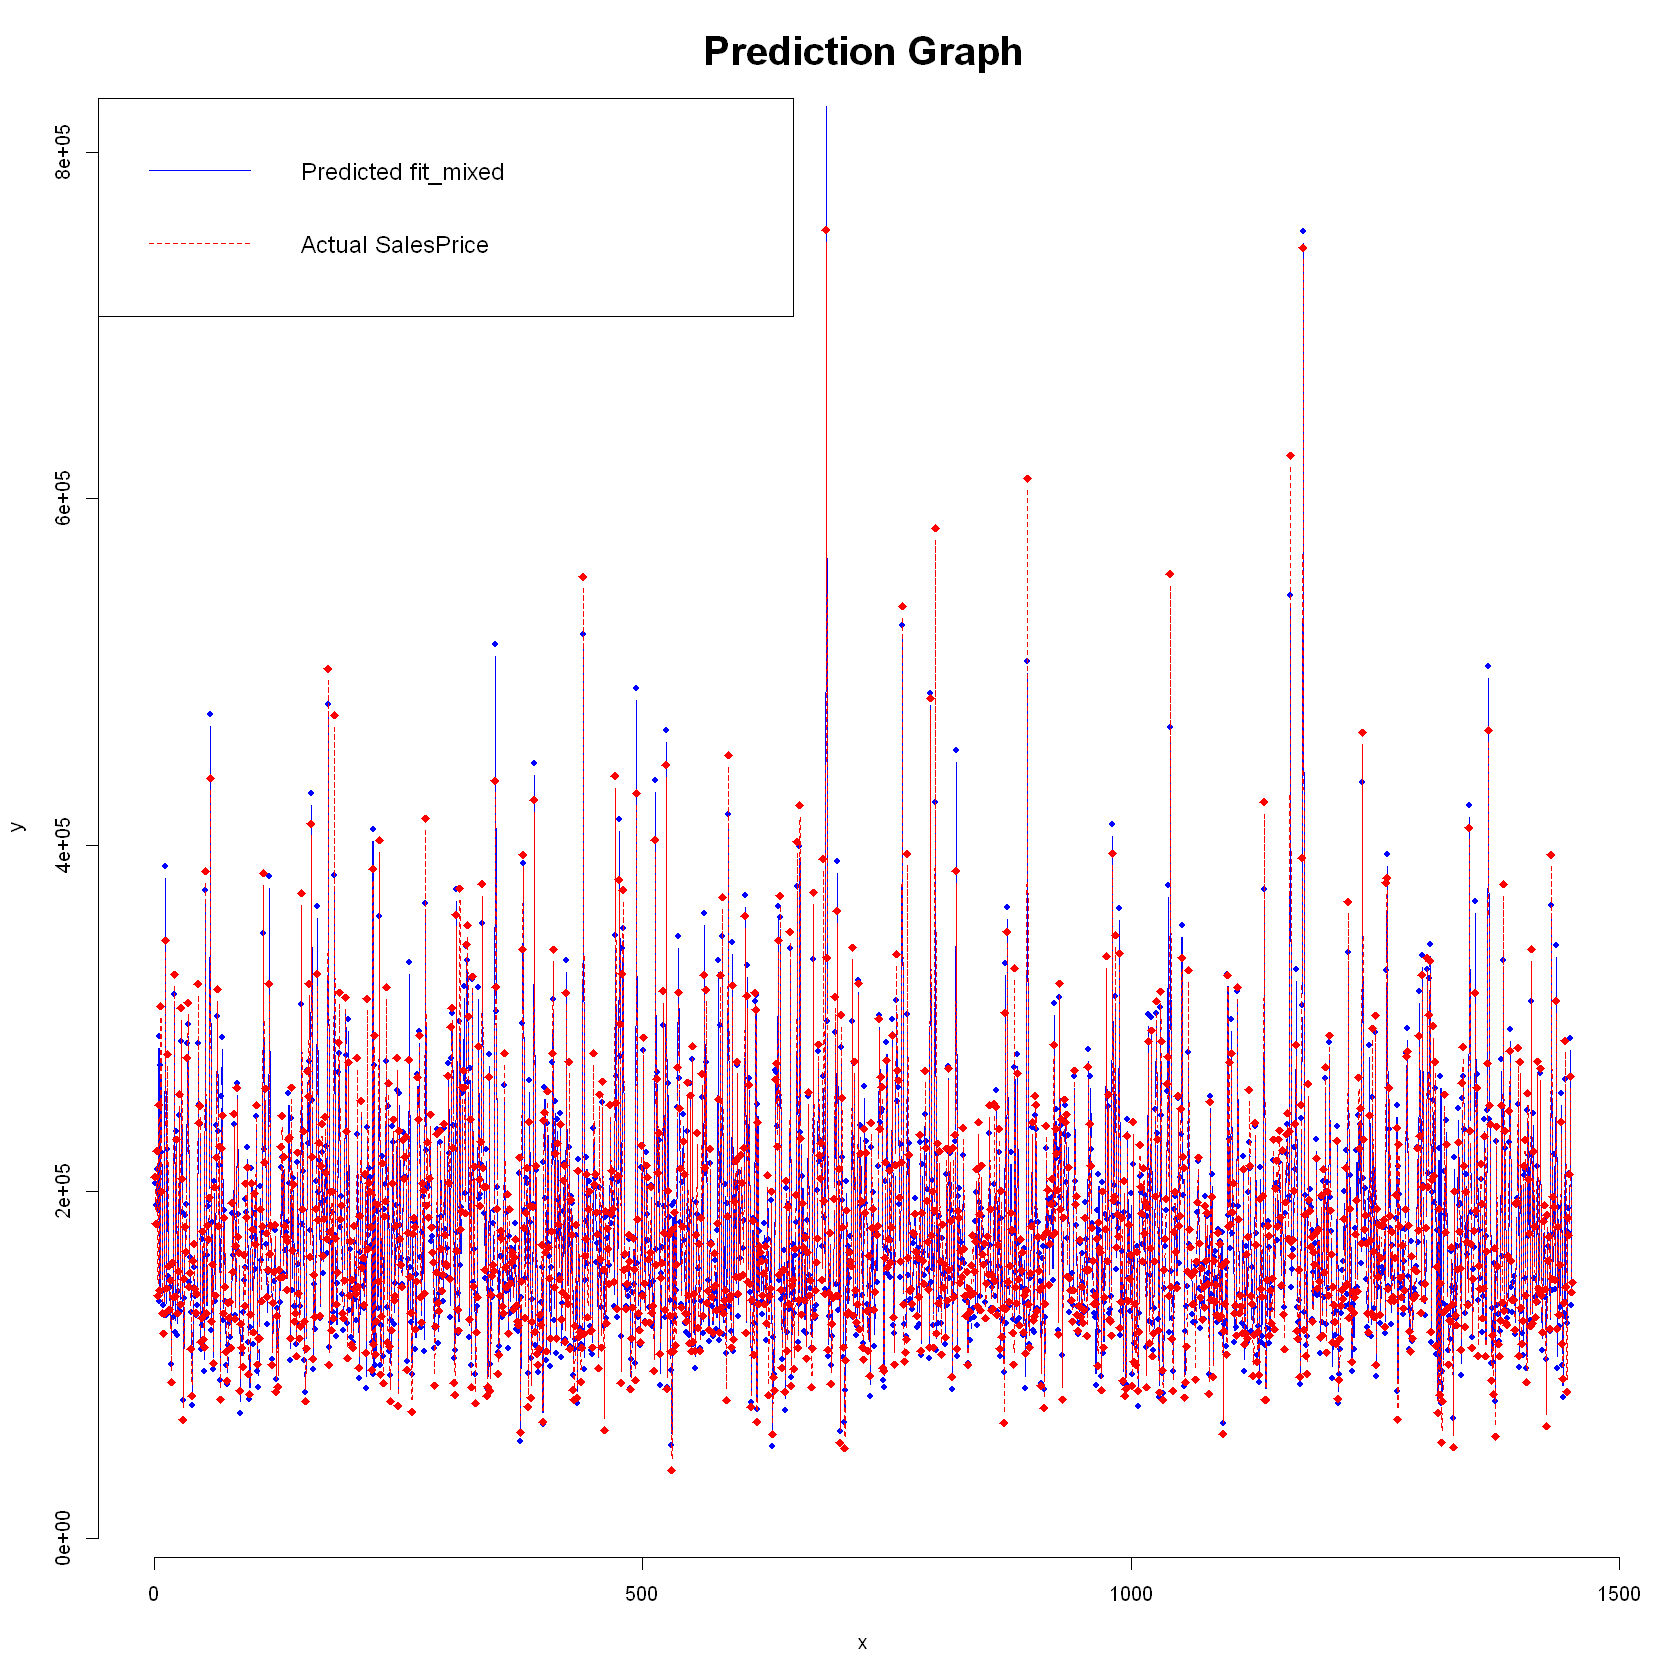

In [159]:
plot(predicted1, type = "b", frame = FALSE, pch = 20, col = "blue", xlab = "x", ylab = "y",
      main="Prediction Graph", cex.main=2, ylim=c(20000,800000))

lines(actual1, pch = 18, col = "red", type = "b", lty = 2)

legend("topleft", legend=c("Predicted fit_mixed", "Actual SalesPrice"), col=c("blue", "red"), lty = 1:2, cex=1.2)

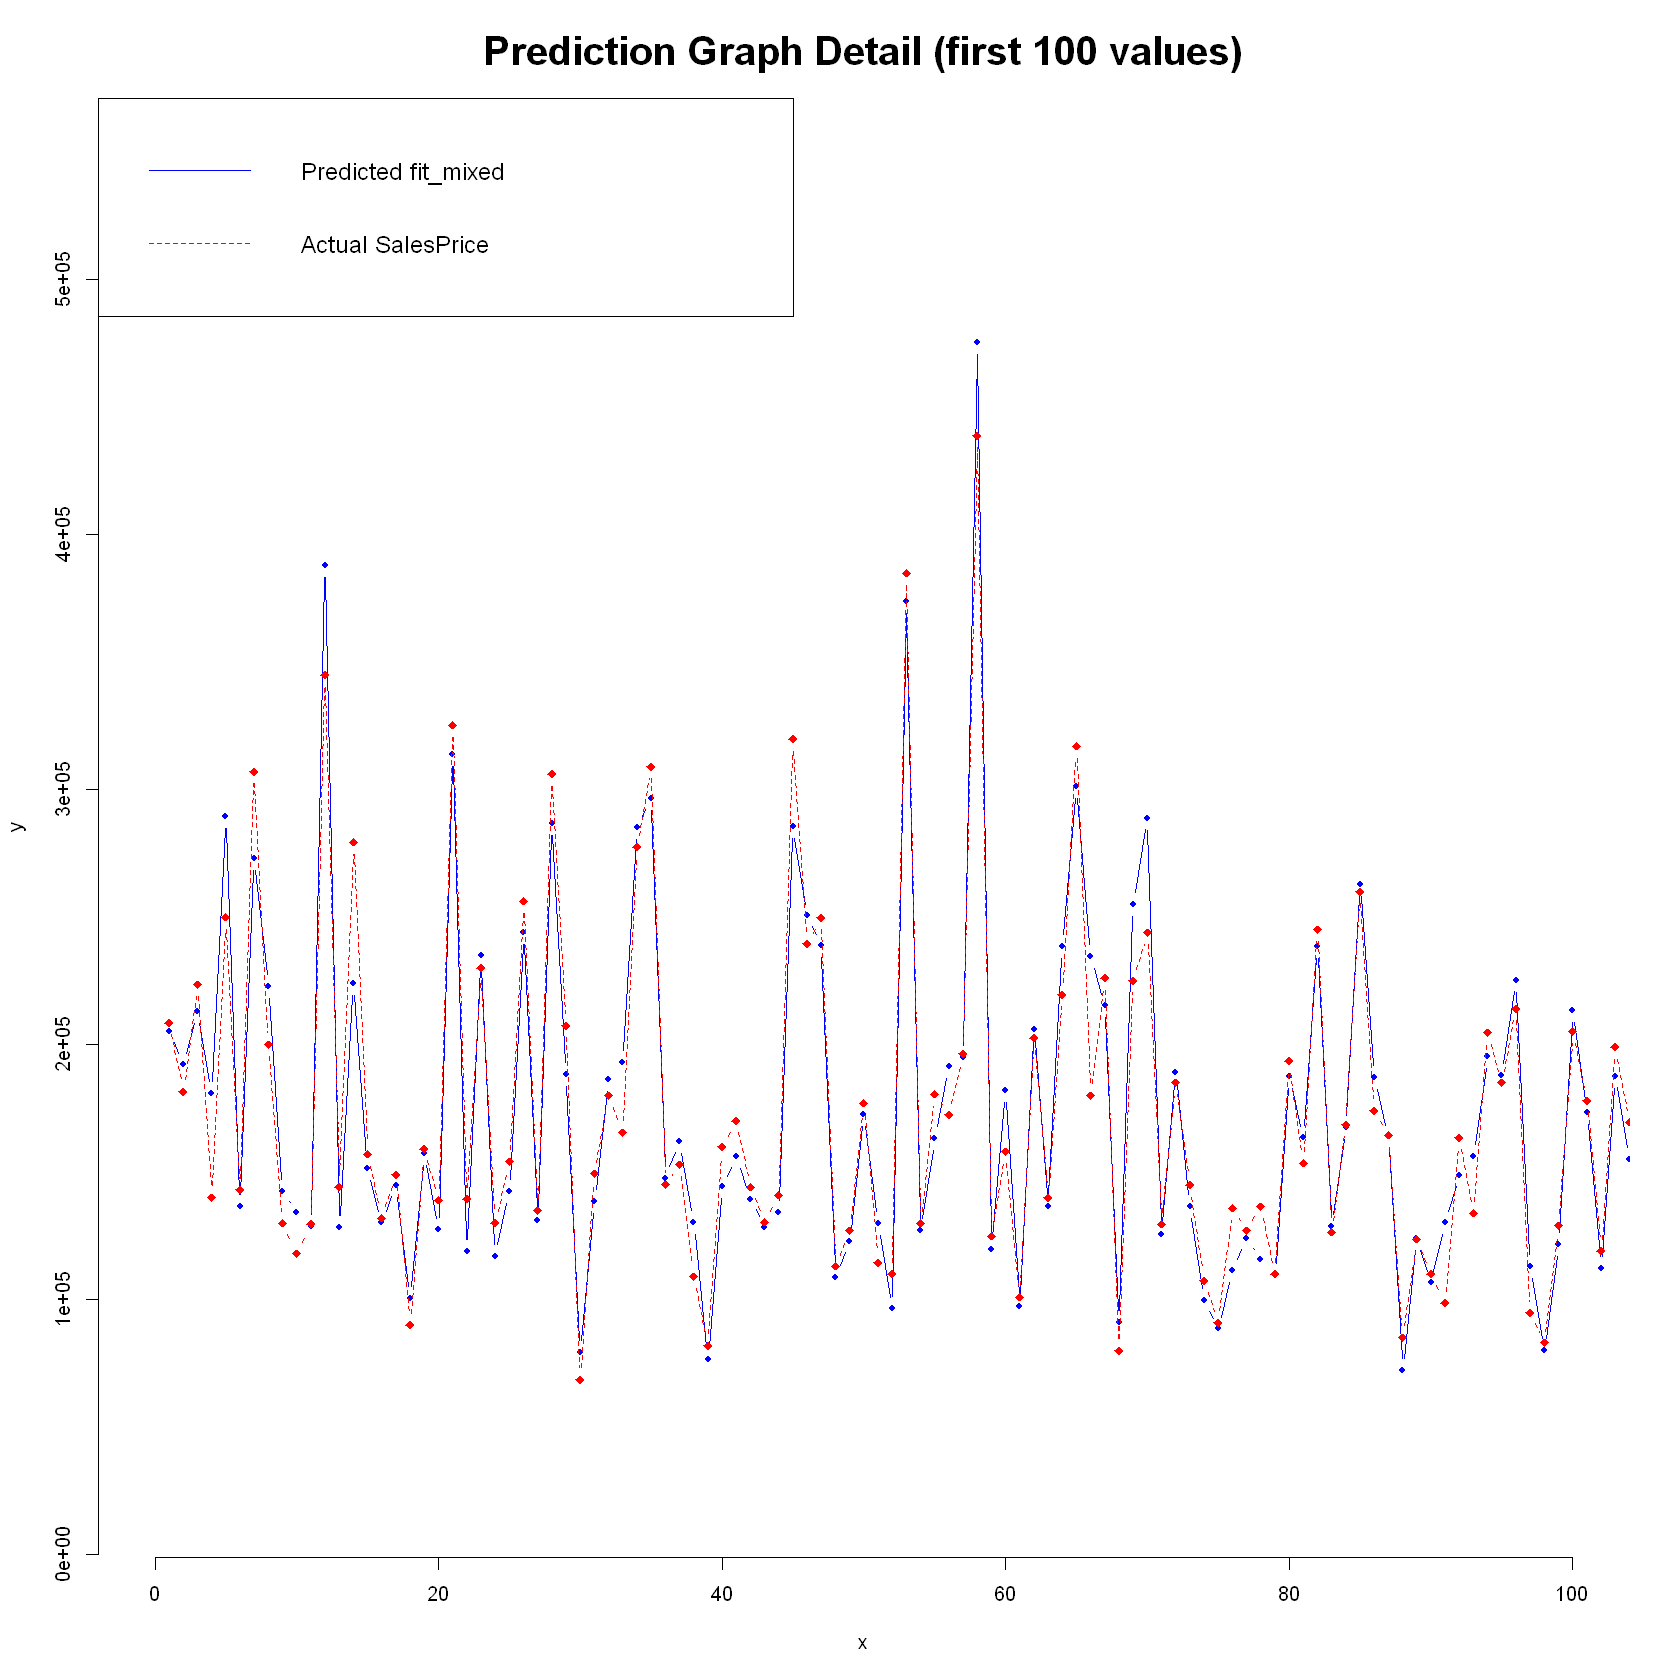

In [160]:
plot(predicted1, type = "b", frame = FALSE, pch = 20, col = "blue", xlab = "x", ylab = "y",
      xlim=c(0, 100), ylim=c(20000,550000), main="Prediction Graph Detail (first 100 values)", cex.main=2)

lines(actual1, pch = 18, col = "red", type = "b", lty = 2, xlim= c(0, 100), ylim=c(20000,550000))

legend("topleft", legend=c("Predicted fit_mixed", "Actual SalesPrice"), col=c("blue", "red"), lty = 1:2, cex=1.2)

In [127]:
actual1 = house$SalePrice
predicted1 = exp(predict(fit_robust, data=house))

MAPE_mixed = mape(predicted1, actual1)
MAPE_mixed

RMSLE_mixed = rmsle(actual1, predicted1)
RMSLE_mixed

[1] 0.07514962

[1] 0.1166279

<div class="alert alert-block alert-info"> <font size=5> <b> 6. Predict the Test Dataset</b> </font></div>

In [183]:
# import train dataset to dataframe
data = read.csv("test.csv")

# Transform all character variables to factors
test = mutate_if(data, is.character, as.factor)

In [185]:
# save prediction in variable
predictions = predict(fit_mixed, data=test)
predictions

1        2        3        4        5        6        7        8 
12.23075 12.16559 12.26862 12.10564 12.57563 11.82457 12.51678 12.31427 
       9       10       11       12       13       14       15       16 
11.86655 11.80692 11.76482 12.86877 11.76263 12.32009 11.92666 11.77680 
      17       18       19       20       21       22       23       24 
11.88207 11.51827 11.96661 11.75466 12.65681 11.68680 12.36673 11.67079 
      25       26       27       28       29       30       32       33 
11.86595 12.40545 11.78226 12.56660 12.14551 11.28174 11.83780 12.13438 
      34       35       36       37       38       39       40       41 
12.16959 12.56139 12.59956 11.90255 11.99579 11.77701 11.24476 11.87889 
      42       43       44       45       46       47       48       49 
11.95790 11.84473 11.76354 11.80732 12.56179 12.43130 12.38392 11.59745 
      50       51       52       53       54       55       56       57 
11.71719 12.05914 11.77423 11.47595 12.83195 11.75376 12.00251 12.16283 
      58       59       60       61       62       63       64       65 
12.18118 13.07193 11.69275 12.11237 11.48514 12.23568 11.82511 12.38148 
      66       67       68       69       70       71       72       73 
12.61621 12.36567 12.27951 11.41920 12.44954 12.57373 11.74085 12.15019 
      74       75       76       77       78       79       80       81 
11.82383 11.51022 11.39135 11.62143 11.72895 11.66045 11.60178 12.14077 
      82       83       84       85       86       87       88       89 
12.00421 12.38283 11.76445 12.02862 12.47863 12.13905 12.00634 11.18606 
      90       91       92       93       94       95       96       97 
11.72689 11.57678 11.77610 11.91006 11.95939 12.18280 12.14331 12.32544 
      98       99      100      101      102      103      104      105 
11.63539 11.29130 11.70894 12.27038 12.06309 11.62652 12.14241 11.95025 
     106      107      108      109      110      111      112      113 
12.40351 11.47326 11.37670 11.65950 12.21997 11.98368 12.08220 12.76260 
     114      115      116      117      118      119      120      121 
12.32096 12.46159 12.04128 11.72076 11.94066 12.85362 12.10421 12.10071 
     122      123      124      125      126      127      128      129 
11.54320 11.81058 11.90464 12.08839 11.42499 11.79580 11.38088 11.95186 
     130      131      132      133      134      135      136      137 
11.82158 12.27255 12.30090 11.93618 12.29817 12.01934 12.07966 11.87250 
     138      139      140      141      142      143      144      145 
12.11405 12.45572 12.22860 11.53847 12.39874 11.86871 12.24432 11.80332 
     146      147      148      149      150      151      152      153 
11.80371 11.62468 12.28775 11.96945 11.71631 11.80591 12.63822 12.10809 
     154      155      156      157      158      159      160      161 
12.26295 11.53618 11.34305 11.59560 12.50629 12.33729 12.52453 12.08600 
     162      163      164      165      166      167      168      169 
12.97178 12.43965 11.48934 11.89523 11.70110 12.23471 12.80639 12.20414 
     170      171      172      173      174      175      176      177 
12.29311 11.75169 12.17212 12.31466 11.93706 12.25887 12.18121 12.32809 
     178      179      180      181      182      183      184      185 
12.00869 13.08455 11.61059 12.04610 12.08058 11.73398 12.14483 11.77975 
     186      187      188      189      190      191      192      193 
12.85514 12.06979 11.66674 11.89850 12.50159 12.54088 12.09632 12.19267 
     194      195      196      197      198      199      200      201 
11.85474 11.69371 11.90772 12.65213 12.53733 11.72910 12.60943 11.78815 
     202      203      204      205      206      207      208      209 
12.02488 11.66002 11.87305 11.63588 12.04855 11.83489 11.74279 12.35849 
     210      211      212      213      214      215      216      217 
11.88174 11.43333 12.01229 12.43808 11.97224 11.88555 11.79648 12.24954 
     218      219      220      221      222      223      224   